In [112]:
import pandas as pd
import numpy as np

In [113]:
df = pd.read_csv('/Users/karthi/Desktop/Courses/Waterloo Course/Project/Covid_deaths/Covid_Deaths.csv')

In [114]:
df1 = df.copy()

In [115]:
df.head()

,_id,date,deaths_total,death_covid,death_covid_contrib,death_unknown_missing
0,1,2020-04-01T00:00:00,17,12,2,3
1,2,2020-04-02T00:00:00,30,24,2,4
2,3,2020-04-03T00:00:00,21,14,2,5
3,4,2020-04-04T00:00:00,30,23,2,5
4,5,2020-04-05T00:00:00,28,19,3,6


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   _id                    1443 non-null   int64 
 1   date                   1443 non-null   object
 2   deaths_total           1443 non-null   int64 
 3   death_covid            1443 non-null   int64 
 4   death_covid_contrib    1443 non-null   int64 
 5   death_unknown_missing  1443 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 67.8+ KB


There are no missing values present in this dataset. 

Dropping the _id column represents the _id value of each row and we cant do much with this information and since we already have the index starting from 0 its best to drop this complete column

In [117]:
df1.drop(columns='_id',axis=1,inplace=True)

In [118]:
df1.head()

,date,deaths_total,death_covid,death_covid_contrib,death_unknown_missing
0,2020-04-01T00:00:00,17,12,2,3
1,2020-04-02T00:00:00,30,24,2,4
2,2020-04-03T00:00:00,21,14,2,5
3,2020-04-04T00:00:00,30,23,2,5
4,2020-04-05T00:00:00,28,19,3,6


Lets change the datatype of the date column as it is an object time, we'll convert it to a datetime datatime so we can create some useful visualizations.

In [119]:
df1['date'] = pd.to_datetime(df1['date'])


Lets create additional two columns for year and month which will help give us meaningful insights at a granular level

In [120]:
df1.head()

,date,deaths_total,death_covid,death_covid_contrib,death_unknown_missing
0,2020-04-01,17,12,2,3
1,2020-04-02,30,24,2,4
2,2020-04-03,21,14,2,5
3,2020-04-04,30,23,2,5
4,2020-04-05,28,19,3,6


In [121]:
df1['Year'] = df1['date'].dt.year
df1['Month'] = df1['date'].dt.month
df1.head()

,date,deaths_total,death_covid,death_covid_contrib,death_unknown_missing,Year,Month
0,2020-04-01,17,12,2,3,2020,4
1,2020-04-02,30,24,2,4,2020,4
2,2020-04-03,21,14,2,5,2020,4
3,2020-04-04,30,23,2,5,2020,4
4,2020-04-05,28,19,3,6,2020,4


Lets look into deaths_total column -> Total number of deaths involving COVID-19


In [122]:
df1.deaths_total.describe()

count    1443.000000
mean       12.784477
std        14.359752
min         0.000000
25%         4.000000
50%         8.000000
75%        16.000000
max        87.000000
Name: deaths_total, dtype: float64

we used the describe() method on the deaths_total which involves total number of deaths in a single day involving COVID-19 but doesnt have to be the underlying reason of the death.We see here the average total death count in this dataset is 12 deaths per day. 25% below the data we have 4 deaths and below 50% of the data 8 deaths and finally below 75% of the dataset 16 deaths. With the maximum amounts of deaths in a day being 87. 

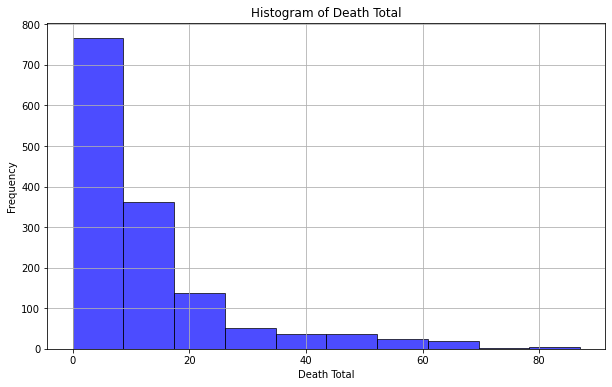

In [123]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df1['deaths_total'], bins=10, color='blue', edgecolor='black', alpha=0.7)


plt.title('Histogram of Death Total')
plt.xlabel('Death Total')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In this histogram we get a distribution of the total deaths in this dataset, this histogram shows us a right skewed plot, meaning that majority of the data points ( or total deaths ) are heavily clustered towards the left which tells us that there are majorily less number of total deaths and very few high number of total deaths towards the right since the tail is towards the right. 

In [124]:
df1.groupby('Year')['deaths_total'].sum().sort_values()

Year
2024     338
2023    2005
2020    4726
2021    5366
2022    6013
Name: deaths_total, dtype: int64

We grouped the data by the year to see which year had the highest total number of deaths using the sum(), we see the year 2020 with 4726 total number of deaths followed by an increase to 5366,6013, and the decrease to 2005 in the years 2021,2022,23 and finally 2024 with 338 total number of deaths. we see an increasing trend and it decreases as we hit the year 2023 with the highest number of deaths being in the year of 2022 and keep in mind this is total number of deaths involving covid 19 but doesnt nesscarlity mean the death was caused because of covid, we have the column death_covid for that.

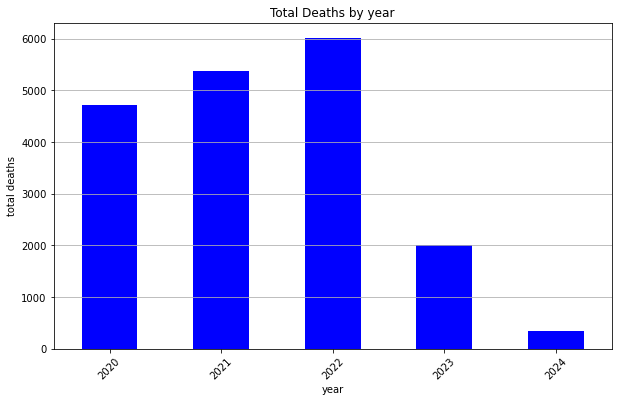

In [125]:
yearly_deaths_total = df1.groupby('Year')['deaths_total'].sum()
yearly_deaths_total.plot(kind='bar',figsize=(10,6),color='blue')

plt.title('Total Deaths by year')
plt.xlabel('year')
plt.ylabel('total deaths')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

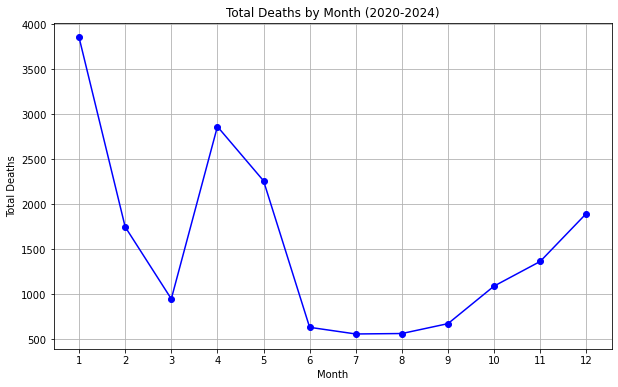

In [126]:

df_years = df1[df1['Year'].between(2020, 2024)]


monthly_deaths_total = df_years.groupby('Month')['deaths_total'].sum()


monthly_deaths_total.plot(kind='line', figsize=(10, 6), marker='o', color='blue')


plt.title('Total Deaths by Month (2020-2024)')
plt.xlabel('Month')
plt.ylabel('Total Deaths')
plt.xticks(monthly_deaths_total.index)  
plt.grid(True)  
plt.show()


Here we plot the aggregate sum of total deaths by months in between the years (2020-2024) this gives us better understanding from which month had the highest number of total deaths and we see it starts in the month of january and theres a steep drop to march and starts rising again reaching a peak in the month of april with another downtrend after. But this doesnt best represent which year the month of january belongs to. 

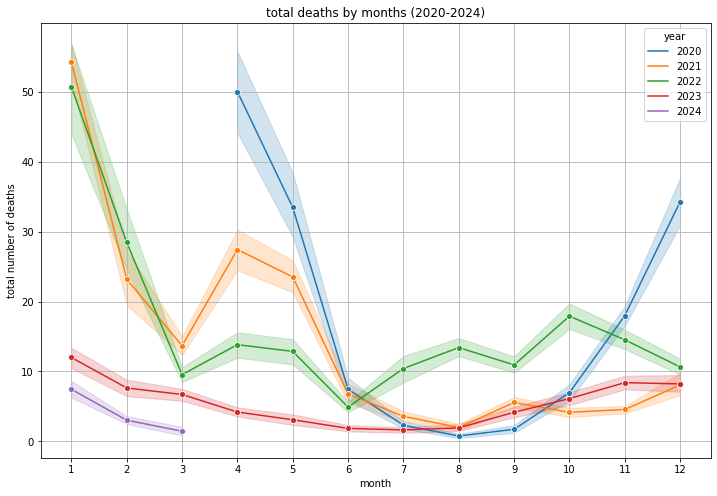

In [127]:
df_years = df1[df1['Year'].between(2020,2024)]

plt.figure(figsize=(12,8))
sns.lineplot(data=df_years,x='Month',y='deaths_total',hue='Year',marker='o',palette='tab10')

plt.title('total deaths by months (2020-2024)')
plt.xlabel('month')
plt.ylabel('total number of deaths')
plt.xticks(df_years['Month'].unique())
plt.grid(True)
plt.legend(title='year',loc='upper right')
plt.show()

we plot a lineplot using the seaborn library where we keep year as the hue to differentaite the different line trends by month.Lets start by observing the year 2020 when covid started. we are missing 3 months of data, the line starts from the month of april and we observe a steep decline in total deaths and it starts rising again from the month of september and starts to increase all the way into year 2021 which also starts the year of with high number of eaths and decrease to march and goes up a little in april but again maintains a downtrend through out the year all the way upto december. So this was the year where the first dose of vaccines were probably rolling out so thats why we see a decrease in deaths. And in the year 2022 has a simliar pattern that of 2022 and from 2023 onwards to 2024 there has been a huge decrease in the total number of deaths in Ontario with all the people being vaccinated and prevention methods kept in place Ontario has managed to control the positive cases from the year 2022 onwards.

In [128]:
yearly_percent_change =df1.groupby('Year')[['deaths_total']].sum().reset_index()

In [129]:
yearly_percent_change['percent_change'] = yearly_percent_change['deaths_total'].pct_change() * 100
yearly_percent_change

,Year,deaths_total,percent_change
0,2020,4726,NaN
1,2021,5366,13.542107
2,2022,6013,12.057398
3,2023,2005,-66.655580
4,2024,338,-83.142145


In [130]:
yearly_percent_change['percent_change'] = yearly_percent_change['percent_change'].fillna(0)
yearly_percent_change

,Year,deaths_total,percent_change
0,2020,4726,0.000000
1,2021,5366,13.542107
2,2022,6013,12.057398
3,2023,2005,-66.655580
4,2024,338,-83.142145


In [131]:
yearly_percent_change['percent_change'] = yearly_percent_change['percent_change'].round(2)
yearly_percent_change

,Year,deaths_total,percent_change
0,2020,4726,0.00
1,2021,5366,13.54
2,2022,6013,12.06
3,2023,2005,-66.66
4,2024,338,-83.14


Here we see that from 2020 to 2021 there was a 13% incerease in total deaths and decreased 1% from 2022. We see that there were drastic decrease in total deaths from 2023 onwards 66% and 83%. This gives us an overview of how percentage of total deaths have been decreasing since the inception of covid 19, in other words that more vaccinations and prevention methods have been pushed forth of the province of Ontario to stop the widespread of the virus.

In [132]:
df1[['deaths_total']].sort_values(by='deaths_total',ascending=False).head(10)

,deaths_total
662,87
18,87
661,81
291,79
664,73
655,72
32,71
659,69
21,69
28,68


In [133]:
df1.sort_values(by='deaths_total',ascending=False).head(10)

,date,deaths_total,death_covid,death_covid_contrib,death_unknown_missing,Year,Month
662,2022-01-23,87,65,18,4,2022,1
18,2020-04-19,87,68,8,11,2020,4
661,2022-01-22,81,57,20,4,2022,1
291,2021-01-17,79,64,13,2,2021,1
664,2022-01-25,73,55,13,5,2022,1
655,2022-01-16,72,50,21,1,2022,1
32,2020-05-03,71,46,15,10,2020,5
659,2022-01-20,69,43,22,4,2022,1
21,2020-04-22,69,49,12,8,2020,4
28,2020-04-29,68,46,14,8,2020,4


Here we sort the dataframe to get the top 10 total deaths throughout the entire dataset, We see that the years all take place in the range of 2020-2022, so this would be the timeframe of high number of total deaths in the combined years. 

Lets look into death_covid column -> Number of deaths with “COVID-19 as the underlying cause of death”
Now we can hone in on our dataset even further to bring out the number of deaths that were caused by covid 19 alone.

In [134]:
df1['death_covid'].describe()

count    1443.000000
mean        8.969508
std        10.591607
min         0.000000
25%         2.000000
50%         5.000000
75%        11.000000
max        68.000000
Name: death_covid, dtype: float64

for the deaths caused by COVID-19 there is an average of 9 deaths in the entire dataset, lets try to get a better depiction of this column through a histogram.


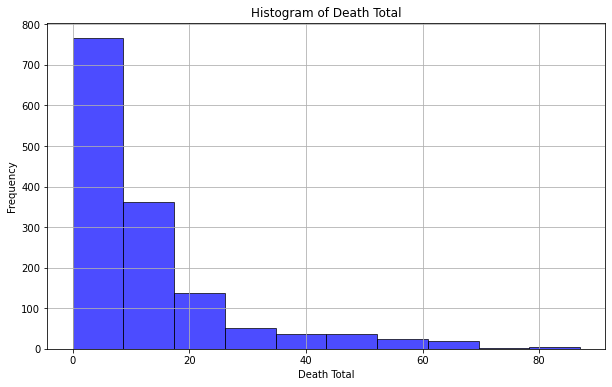

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df1['deaths_total'], bins=10, color='blue', edgecolor='black', alpha=0.7)


plt.title('Histogram of Death Total')
plt.xlabel('Death Total')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

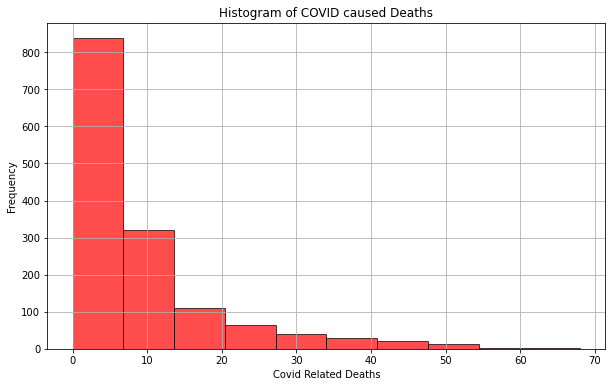

In [136]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6))
plt.hist(df1['death_covid'],bins=10,color='red',edgecolor='black',alpha=0.7)

plt.title('Histogram of COVID caused Deaths')
plt.xlabel('Covid Related Deaths')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

similarly as our total deaths column, this column also has a right skewed tail, meaning we have higher concentration frequency of low number of deaths and less frequncy of high number of deaths.

Lets see which year had the prominent number of covid caused deaths, again if we were to guess a year it would have to fall in the range of 2020-2022

In [137]:
df1.groupby('Year')[['death_covid']].sum().reset_index().sort_values(by='death_covid',ascending=False)

,Year,death_covid
1,2021,4187
2,2022,3925
0,2020,3298
3,2023,1309
4,2024,224


our assumption was correct, 2021 had the highest number of covid caused deaths followed by 2022 and then 2020 and from 2023 onwards we have a decrease in deaths. This makes sense since 2020 was the start of COVID 19 and it would obviosuly take some time for the virus to spread throughout the province effecting everyone in it, by 2022 covid has completly taken over households and continued into 2023 leading to high number of deaths. 

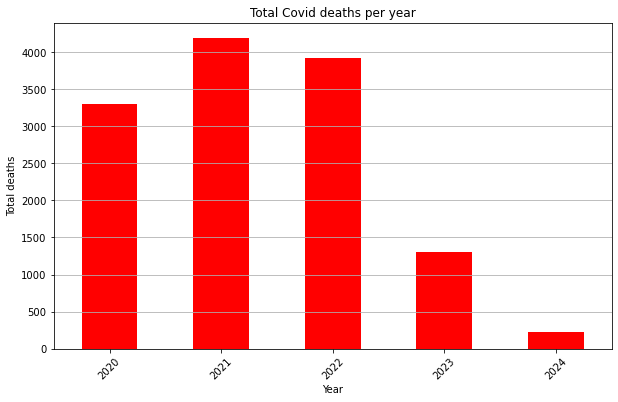

In [138]:
yearly_covid_deaths_total = df1.groupby('Year')['death_covid'].sum()
yearly_covid_deaths_total.plot(kind='bar',figsize=(10,6),color='red')

plt.title('Total Covid deaths per year')
plt.xlabel('Year')
plt.ylabel('Total deaths')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


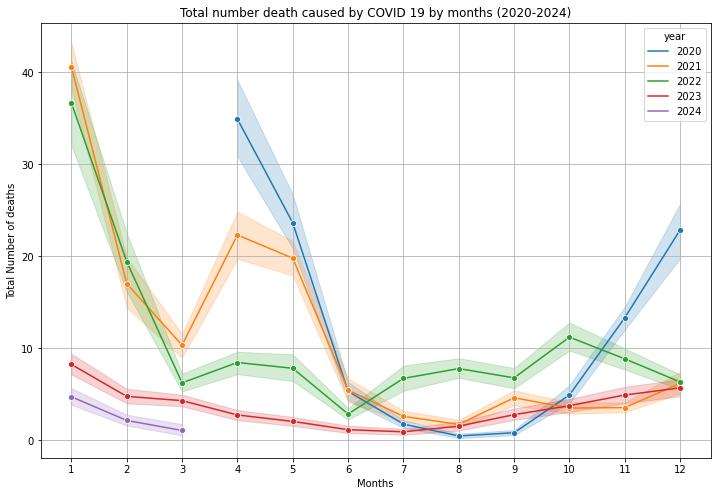

In [214]:
df_years = df1[df1['Year'].between(2020,2024)]

plt.figure(figsize=(12,8))
sns.lineplot(data=df_years,x='Month',y='death_covid',hue='Year',marker='o',palette='tab10')

plt.title('Total number death caused by COVID 19 by months (2020-2024)')
plt.xlabel('Months')
plt.ylabel('Total Number of deaths')
plt.xticks(df_years['Month'].unique())
plt.grid(True)
plt.legend(title='year',loc='upper right')
plt.show()

In this line plot we see that January and April are the months in all the 3 years where we see high number of deaths caused by COVID 19 and they decrease in the remainder of the year and slowly rise up towards the end of the year but in the years 2021 and 2022 we see high number of death cases in the month of january followed by march. 

In [140]:
yearly_percent_change2 = df1.groupby('Year')[['death_covid']].sum().reset_index()

In [141]:
yearly_percent_change2['percent_change'] = yearly_percent_change2['death_covid'].pct_change()*100
yearly_percent_change2

,Year,death_covid,percent_change
0,2020,3298,NaN
1,2021,4187,26.955731
2,2022,3925,-6.257464
3,2023,1309,-66.649682
4,2024,224,-82.887701


In [142]:
yearly_percent_change['percent_change'] = yearly_percent_change['deaths_total'].pct_change() * 100
yearly_percent_change

,Year,deaths_total,percent_change
0,2020,4726,NaN
1,2021,5366,13.542107
2,2022,6013,12.057398
3,2023,2005,-66.655580
4,2024,338,-83.142145


In [143]:
yearly_percent_change2['percent_change'] = yearly_percent_change2['percent_change'].fillna(0).round(2)
yearly_percent_change2

,Year,death_covid,percent_change
0,2020,3298,0.00
1,2021,4187,26.96
2,2022,3925,-6.26
3,2023,1309,-66.65
4,2024,224,-82.89


In [ ]:
# correlation analysis

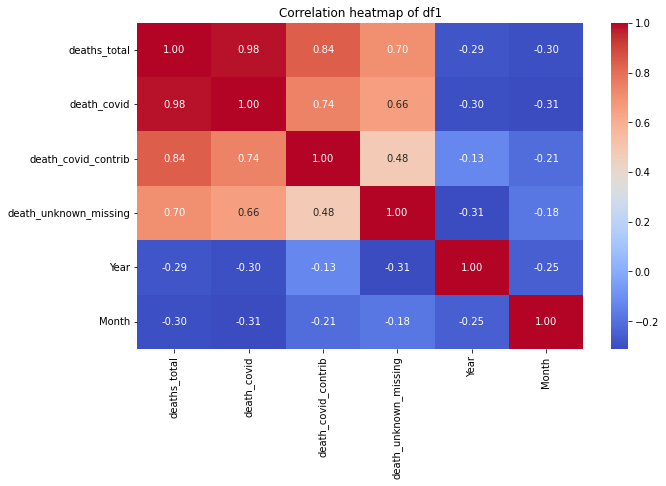

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm',fmt='.2f')

plt.title('Correlation heatmap of df1')

plt.show()

from this heat map we can see that the deaths_total and death_covid variables are highly correlated with each other giving us a 0.98 score and death_covid_contribute with a 0.84 score because this feature involves the cases with COVID 19 but not the underlying cause of the deaths. Another intresting features we can further look in are the death_covid and death_covid_contrib columns with a score of 0.74. Lets map these correlations on to a scatterplot.

In [146]:
correlation_coefficient = df1['death_covid'].corr(df1['deaths_total'])
print('correlation coefficient',correlation_coefficient)

correlation coefficient 0.9841399998101669


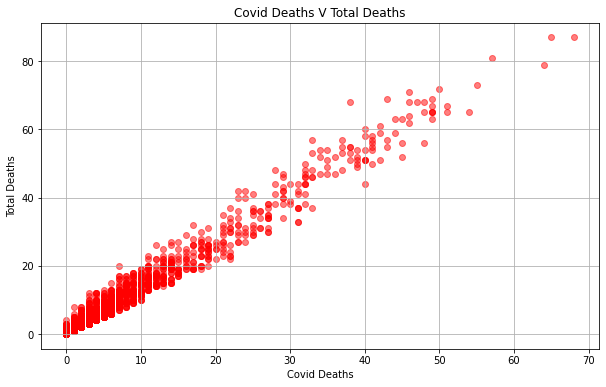

In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df1['death_covid'],df1['deaths_total'],color='red',alpha=0.5)

plt.title('Covid Deaths V Total Deaths')
plt.xlabel('Covid Deaths')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.show()

Just as we saw in our heatmap there is strong positive correlation between these two variables (0.98), as the our deaths caused by covid increase so do our total deaths. meaning the deaths caused by covid played a big role in the overall deaths. 

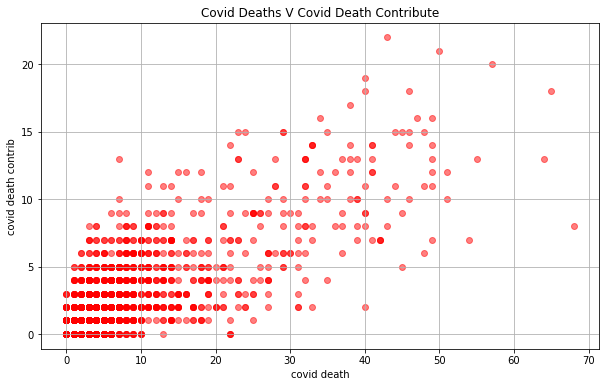

In [153]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df1['death_covid'],df1['death_covid_contrib'],color='red',alpha=0.5)

plt.title('Covid Deaths V Covid Death Contribute')
plt.xlabel('covid death')
plt.ylabel('covid death contrib')
plt.grid(True)
plt.show()

These two features gave us a correlation score of 0.74 we see that as the number of covid deaths increase we only have a few datapoints whihc slightly increase as well meaning these cases had covid 19 but there were other factors at play which caused the paitients death. it wasnt because of Covid. But when we see the corr score between covid_death_contrib and total_deaths the corr score is 0.84 which makes sense since the deaths added up into the total number of deaths not with covid being the underlying reason for the death itself.

Summary: 

If we analyse the 'death_covid' column , 2021 was the year where Ontario had the highest Number of deaths caused by COVID 19 with a total of 4187 deaths followed by the year 2022  with a total of 3925 deaths (6% decrease) with January being the peak month in both the years.From the year 2023 onwards there has been a significant decrease in the number of deaths caused by covid-19  2022 to 2023 we see a 66% decrease and 2023 to 2024 an 82% decrease in the total number of deaths. So we can say that there are  preventatitve measures being put in place to reduce the virus from spreading in Ontario whether its through vaccinations, medical assistance , social distancing ect.. But we can conclude that 2021-2022 were the peak years where majority of the deaths from Covid took place in the province of Ontario.